# Task 1 - Student Score Percentage Prediction
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

## Import statements 
We will use the in build sci - kit linear regression model to predict the target variable.

In [80]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Loading Dataset

In [175]:
url = "http://bit.ly/w-data"
dataset = pd.read_csv(url)
dataset.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Slicing data and splitting data

In [127]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## Data Visualizing 

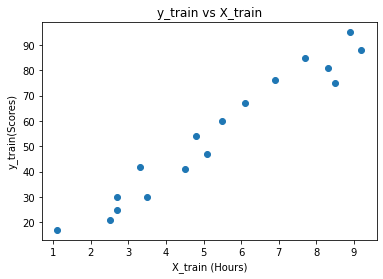

In [157]:
plt.scatter(X_train, y_train)
plt.title("y_train vs X_train")
plt.xlabel("X_train (Hours)")
plt.ylabel("y_train(Scores)")
plt.show()

## Models
We will now do trial and error with two types of models 
- Linear Regression
- Polynomial Regression

### Linear Regression Model

In [158]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
y_linear_pred = linear_regressor.predict(X_test)

#### Visualising Results

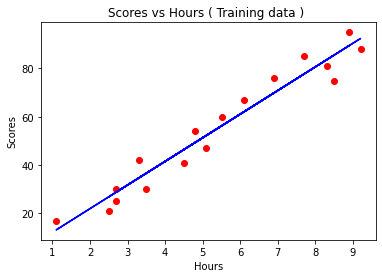

In [159]:
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, linear_regressor.predict(X_train), color='blue')
plt.title('Scores vs Hours ( Training data ) ')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

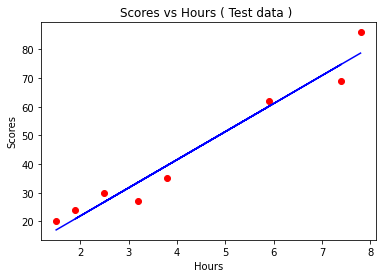

In [160]:
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, linear_regressor.predict(X_test), color='blue')
plt.title('Scores vs Hours ( Test data ) ')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

#### Evaluating Performance

In [161]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_linear_pred})  
df 

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


In [162]:
from sklearn import metrics

print(metrics.mean_absolute_error(y_test, y_linear_pred))
print(metrics.mean_squared_error(y_test, y_linear_pred))


4.419727808027652
22.96509721270043


#### Prediction for 9.25 hours

In [176]:
pred_result = linear_regressor.predict([[9.25]])
pred_result[0]

92.91505723477056

### Polynomial Regression Model

In [163]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree = 4)
X_poly_train = poly_features.fit_transform(X_train)
poly_features.fit(X_poly_train, y_train)

PolynomialFeatures(degree=4)

In [164]:
X_poly_train

array([[1.0000000e+00, 6.9000000e+00, 4.7610000e+01, 3.2850900e+02,
        2.2667121e+03],
       [1.0000000e+00, 1.1000000e+00, 1.2100000e+00, 1.3310000e+00,
        1.4641000e+00],
       [1.0000000e+00, 5.1000000e+00, 2.6010000e+01, 1.3265100e+02,
        6.7652010e+02],
       [1.0000000e+00, 7.7000000e+00, 5.9290000e+01, 4.5653300e+02,
        3.5153041e+03],
       [1.0000000e+00, 3.3000000e+00, 1.0890000e+01, 3.5937000e+01,
        1.1859210e+02],
       [1.0000000e+00, 8.3000000e+00, 6.8890000e+01, 5.7178700e+02,
        4.7458321e+03],
       [1.0000000e+00, 9.2000000e+00, 8.4640000e+01, 7.7868800e+02,
        7.1639296e+03],
       [1.0000000e+00, 6.1000000e+00, 3.7210000e+01, 2.2698100e+02,
        1.3845841e+03],
       [1.0000000e+00, 3.5000000e+00, 1.2250000e+01, 4.2875000e+01,
        1.5006250e+02],
       [1.0000000e+00, 2.7000000e+00, 7.2900000e+00, 1.9683000e+01,
        5.3144100e+01],
       [1.0000000e+00, 5.5000000e+00, 3.0250000e+01, 1.6637500e+02,
        9.15

In [165]:
polynomial_regressor = LinearRegression()
polynomial_regressor.fit(X_poly_train, y_train)
y_polynomial_two_pred = polynomial_regressor.predict(poly_features.fit_transform(X_test))

#### Visualising Results

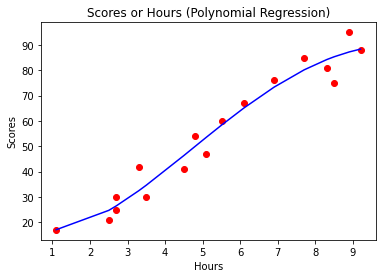

In [166]:
X_train, y_train = zip(*sorted(zip(X_train, y_train)))
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, polynomial_regressor.predict(poly_features.fit_transform(X_train)), color = 'blue')
plt.title('Scores or Hours (Polynomial Regression)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

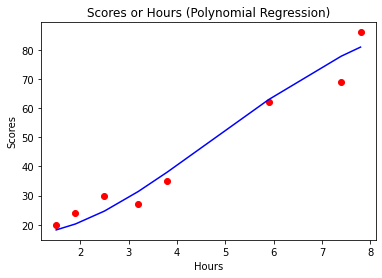

In [167]:
X_test, y_test = zip(*sorted(zip(X_test, y_test)))
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, polynomial_regressor.predict(poly_features.fit_transform(X_test)), color = 'blue')
plt.title('Scores or Hours (Polynomial Regression)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

#### Evaulating Performance

In [168]:
print(metrics.mean_absolute_error(y_test, y_polynomial_two_pred))
print(metrics.mean_squared_error(y_test, y_polynomial_two_pred))

20.614956777356774
762.3204202590955


#### Predicting for 9.25 hours

In [177]:
pred_result = polynomial_regressor.predict(poly_features.fit_transform([[9.25]]))
pred_result[0]

88.51157084995353

#### Function to find out the best degree of model

In [141]:
def polynomial_model(degrees = 2):
    from sklearn.preprocessing import PolynomialFeatures
    poly_features = PolynomialFeatures(degree = degrees)
    X_poly_train = poly_features.fit_transform(X_train)
    poly_features.fit(X_poly_train, y_train)
    polynomial_regressor = LinearRegression()
    polynomial_regressor.fit(X_poly_train, y_train)
    print(polynomial_regressor.coef_)
    print(polynomial_regressor.intercept_)
    y_polynomial_two_pred = polynomial_regressor.predict(poly_features.fit_transform(X_test))
#     graph_of_training_data(X_train, y_train)
#     graph_of_test_data(X_test, y_test)
    return y_polynomial_two_pred

def graph_of_training_data(X_train, y_train):
    plt.scatter(X_train, y_train, color = 'red')
    plt.plot(X_train, polynomial_regressor.predict(poly_features.fit_transform(X_train)), color = 'blue')
    plt.title('Scores or Hours (Polynomial Regression)')
    plt.xlabel('Hours')
    plt.ylabel('Scores')
    plt.show()
    
def graph_of_test_data(X_test, y_test):
    plt.scatter(X_test, y_test, color = 'red')
    plt.plot(X_test, polynomial_regressor.predict(poly_features.fit_transform(X_test)), color = 'blue')
    plt.title('Scores or Hours (Polynomial Regression)')
    plt.xlabel('Hours')
    plt.ylabel('Scores')
    plt.show()

def print_evaluation(y_model_pred):
    print(metrics.mean_absolute_error(y_test, y_model_pred))
    print(metrics.mean_squared_error(y_test, y_model_pred))
    
def get_evaluation_MAE(y_model_pred):
    return metrics.mean_absolute_error(y_test, y_model_pred)
def get_evaluation_MSE(y_model_pred):
    return metrics.mean_squared_error(y_test, y_model_pred)


i is:1
[0.         9.78856669]
2.3708153823419096
i is:2
[ 0.         11.0939799  -0.11974635]
-0.45714072170978426
i is:3
[ 0.         -2.56453398  2.92525889 -0.19571125]
16.236042534105827
i is:4
[ 0.         -6.7314462   4.51330079 -0.42800156  0.01144349]
19.57418979717042
i is:5
[ 0.00000000e+00  4.63129097e+01 -2.38166496e+01  6.13438597e+00
 -6.72561753e-01  2.63107236e-02]
-12.887862218330724
i is:6
[ 0.00000000e+00 -2.03046560e+02  1.40647377e+02 -4.52628554e+01
  7.58832690e+00 -6.33190056e-01  2.06993370e-02]
120.13641338460769
i is:7
[ 0.00000000e+00 -9.57573096e+02  7.35095123e+02 -2.81186080e+02
  5.95914825e+01 -7.08633871e+00  4.42283356e-01 -1.12724636e-02]
478.50568695903434
i is:8
[ 0.00000000e+00 -3.15562829e+02  1.57183689e+02 -8.02053756e+00
 -1.58173186e+01  5.50299961e+00 -8.09256298e-01  5.69016642e-02
 -1.56602069e-03]
200.19224671456954
i is:9
[ 0.00000000e+00 -1.85206464e+04  1.84724894e+04 -9.99574882e+03
  3.28412590e+03 -6.86006609e+02  9.17233376e+01 -7

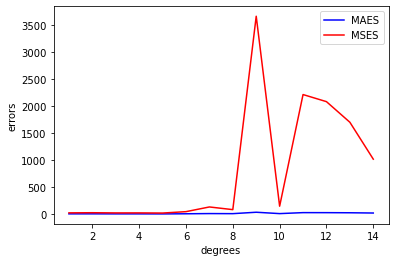

In [169]:
MAES = []
MSES = []
for i in range(1, 15):
    print("i is:" + str(i))
    y_t = polynomial_model(degrees = i)
    MAE = get_evaluation_MAE(y_t)
    MSE = get_evaluation_MSE(y_t)
    MAES.append(MAE)
    MSES.append(MSE)
plt.plot(np.arange(1, 15), MAES, color = 'blue', label='MAES')
plt.plot(np.arange(1, 15), MSES, color='red', label='MSES')
plt.xlabel('degrees')
plt.ylabel('errors')
plt.legend()
plt.show()

### Conclusion 
We saw that with less data linear regression model performs better than polynomial regression and hence is a better choice. 

If we have abundance of data, we can choose the best degree looking at the graph above to get best results.